# 6. Linear Regression with PyTorch

# 1. About Linear Regression

# 1.1 Simple Linear Regression Basics

- Allows us to understand **relationship** between two **continuous variables**
- Example
    - x: independent variable
        - weight
    - y: dependent variable
        - height
    - y = $\alpha x + \beta$

## 1.2 Example of simple linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.rand(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

## 1.3 Aim of Linear Regression

- Minimize the distance between the points and the line($y = \alpha x + \beta$)
- Adjusting
    - Coefficient: $\alpha$
    - Bias/intercept : $\beta$

# 2. Building a Linear Regression Model with Pytorch

## 2.1 Example

- Coefficient: $\alpha$ = 2
- Bias/intercept: $\beta$ = 1
- Equation: $y = 2x + 1$

## 2.2 Building a Toy Dataset

In [2]:
x_values = [i for i in range(11)]

In [3]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [5]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

$y = 2x + 1$

In [6]:
y_values = [2*i + 1 for i in x_values]

In [7]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [8]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [9]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

## 2.3 Building Model

### Critical Imports

In [10]:
import torch
import torch.nn as nn
from torch.autograd import Variable

### Create Model

1. Linear Model
    - True Equation: $y = 2x + 1$
2. Forward
    - Example
        - Input $x = 1$
        - Output $\hat{y}=?$

In [11]:
# Create class
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

#### Insantiate Model Class
- input : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- desired output : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [12]:
input_size = 1
output_size = 1

model = LinearRegressionModel(input_size, output_size)

### Instantiate Loss Class

- MSE Loss : Mean Squared Error
- $MSE = \frac{1}{2}\sum^{n}_{i=1}(\hat{y_i} - y_i)$
    - $\hat{y}$: prediction
    - $y$: true value

In [13]:
criterion = nn.MSELoss()

### Instnatiate Optimizer Class

- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_{\theta}$
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_{\theta}$: parameters' gradients
        
    - Even simplier equation
        - parameters = parameters - learning_rate * parameters_gradients
            - parameters: $\alpha$ and $\beta$ in $y = \alpha x + \beta$
            - desired parameters: $\alpha = 2$ and $\beta = 1$ in $y = 2x + 1$

In [14]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train Model
- 1 epoch: going through the whole x_train data once
    - 100 epochs:
        - 100x mapping x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- Process
    1. Convert inputs/labes to variables
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t parameters
    6. Update parameters using gradients
        - parameters = parameters - learning_rate * parameters_gradients
    7. REPEAT

In [15]:
epochs = 100

In [16]:
for epoch in range(1, epochs+1):
    
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print (f'epoch {epoch}, loss {loss.data[0]}')

epoch 1, loss 210.58480834960938
epoch 2, loss 17.561738967895508
epoch 3, loss 1.8131591081619263
epoch 4, loss 0.5243470668792725
epoch 5, loss 0.4150182604789734
epoch 6, loss 0.40194380283355713
epoch 7, loss 0.39676710963249207
epoch 8, loss 0.3922802209854126
epoch 9, loss 0.3878951072692871
epoch 10, loss 0.38356322050094604
epoch 11, loss 0.3792799115180969
epoch 12, loss 0.37504473328590393
epoch 13, loss 0.37085655331611633
epoch 14, loss 0.3667151629924774
epoch 15, loss 0.3626200258731842
epoch 16, loss 0.3585708737373352
epoch 17, loss 0.3545668125152588
epoch 18, loss 0.350607305765152
epoch 19, loss 0.34669220447540283
epoch 20, loss 0.3428206741809845
epoch 21, loss 0.3389926254749298
epoch 22, loss 0.3352069854736328
epoch 23, loss 0.33146360516548157
epoch 24, loss 0.32776251435279846
epoch 25, loss 0.3241022229194641
epoch 26, loss 0.32048314809799194
epoch 27, loss 0.3169042766094208
epoch 28, loss 0.3133653998374939
epoch 29, loss 0.3098662197589874
epoch 30, loss 

### Compare Data

In [17]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.3049524],
       [ 2.4050455],
       [ 4.505139 ],
       [ 6.605232 ],
       [ 8.705325 ],
       [10.805418 ],
       [12.905511 ],
       [15.005605 ],
       [17.105698 ],
       [19.205791 ],
       [21.305883 ]], dtype=float32)

In [18]:
# y = 2x + 1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

### Plot Graph

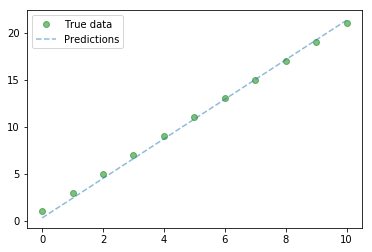

In [19]:
# Clear Figure
plt.clf()

# Get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

### Save Model

In [20]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

### Load Model

In [21]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

# 3. Building a Linear Regression Model with PyTorch (GPU)

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_size = 1
output_size = 1

model = LinearRegressionModel(input_size, output_size)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
for epoch in range(1, epochs+1):
    
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print (f'epoch {epoch}, loss {loss.data[0]}')

GPU: 2 things must be on GPU
- model
- variables

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_size = 1
output_size = 1

model = LinearRegressionModel(input_size, output_size)

#####################
# USE GPU FOR MODEL #
#####################

if torch.cuda.is_available():
    model.cuda()

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
for epoch in range(1, epochs+1):
    
    # Convert numpy array to torch Variable
    
    #####################
    # USE GPU FOR MODEL #
    #####################
    
    if torch.cuda.is_available():
        
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    
    else:
    
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print (f'epoch {epoch}, loss {loss.data[0]}')

# Summary

- Simple **linear regression basics**
    - $y = Ax + B$
    - $y = 2x + 1$
- **Example** of simple linear regression
- **Aim** of linear regression
    - Minimizing distance between the points and the line
        - Calculate "distance" through MSE
        - Calculate gradients
        - Update parameters with parameters = parameters - learning_rate * gradients
        - Slowly update parameters A and B model the linear relationship between y and x of the form y = 2x + 1
- Built a linear regression **model** in **CPU and GPU**
    - Step 1: Create Model Class
    - Step 2: Instantiate Model Class
    - Step 3: Instantiate Loss Class
    - Step 4: Instantiate Optimizer Class
    - Step 5: Train Model
- Important things to be on **GPU**
    - model
    - variables
- How to bring to **GPU**?
    - model_name.cuda()
    - variable_name.cuda()